In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('d:/kaggle/Titanic/train.csv')
test_df=pd.read_csv('d:/kaggle/Titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

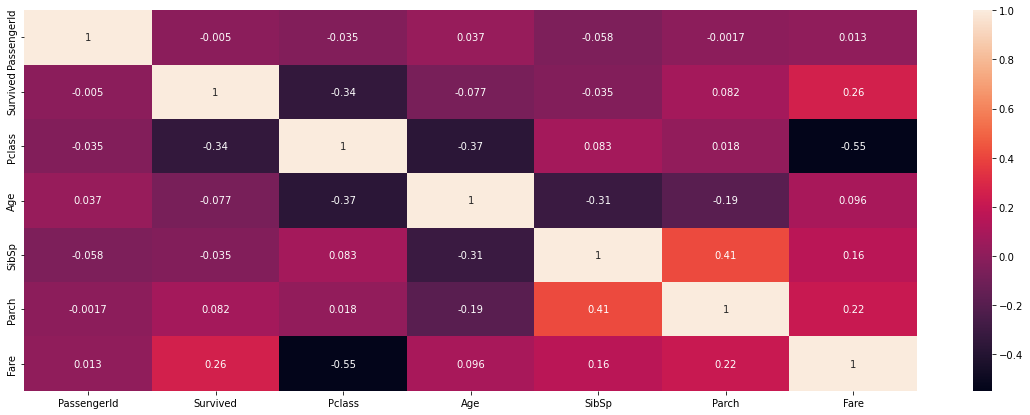

In [4]:
train_df_corr = train_df.corr()
plt.figure(figsize = (20,7))
sns.heatmap(train_df_corr, annot = True)

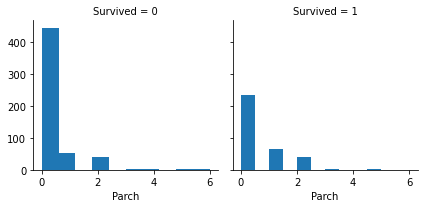

In [5]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Parch', bins=10)

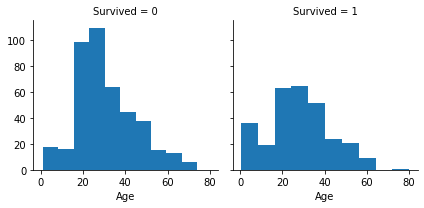

In [6]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=10)

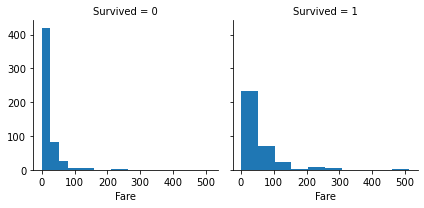

In [7]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=10)

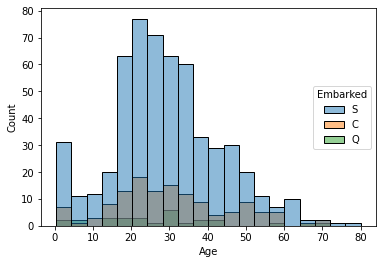

In [8]:
ax = sns.histplot(train_df, x="Age", hue="Embarked")
sns.move_legend(ax, "center right")

In [9]:
train_df['train_test'] = 1
test_df['train_test'] = 0
test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [10]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [11]:
all_data.isna().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
train_test        0
dtype: int64

<AxesSubplot:>

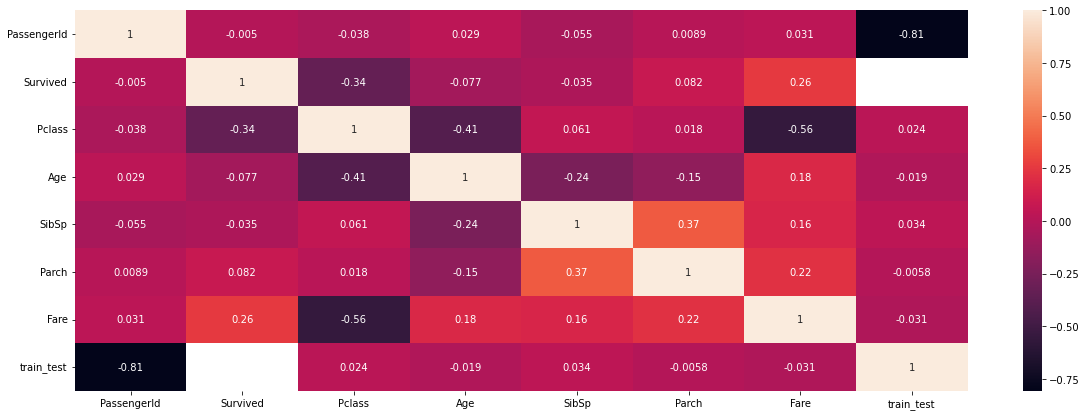

In [12]:
corr = all_data.corr()
plt.figure(figsize = (20,7))
sns.heatmap(corr, annot = True)

In [13]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,-0.807510
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,NaN
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,0.023988
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.018528
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,0.033867
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.005793
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,-0.030831
train_test,-0.807510,NaN,0.023988,-0.018528,0.033867,-0.005793,-0.030831,1.000000


In [14]:
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
train_test          NaN
Name: Survived, dtype: float64

In [15]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [16]:
all_data['Title'] = all_data['Name'].apply(get_title)
all_data['Title'] = all_data['Title'].replace('Mlle', 'Miss')
all_data['Title'] = all_data['Title'].replace('Ms', 'Miss')
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')

In [17]:
all_data['Title'] = all_data['Title'].replace(
       ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
       'Rare')

In [18]:
all_data.Age = all_data.Age.fillna(train_df.Age.median())
all_data.Fare = all_data.Fare.fillna(train_df.Fare.median())

In [19]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_first'] = all_data.Cabin.apply(lambda x: str(x)[0])

In [20]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Title,cabin_multiple,cabin_first
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,0,n
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,0,n
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,1,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,0,n


In [21]:
data=all_data.copy()

In [22]:
data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [23]:
data['Embarked'] = data['Embarked'].replace('S', 1)
data['Embarked'] = data['Embarked'].replace('C', 2)
data['Embarked'] = data['Embarked'].replace('Q', 3)

In [24]:
data.isna().sum().sort_values(ascending=False)

Cabin             1014
Survived           418
Embarked             2
PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
train_test           0
Title                0
cabin_multiple       0
cabin_first          0
dtype: int64

In [25]:
data.Embarked=data.Embarked.replace(np.NaN, 0)

In [26]:
data.isna().sum().sort_values(ascending=False)

Cabin             1014
Survived           418
PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
train_test           0
Title                0
cabin_multiple       0
cabin_first          0
dtype: int64

In [27]:
data['cabin_first'] = data['cabin_first'].replace('n', 1)
data['cabin_first'] = data['cabin_first'].replace('C', 2)
data['cabin_first'] = data['cabin_first'].replace('B', 3)
data['cabin_first'] = data['cabin_first'].replace('D', 4)
data['cabin_first'] = data['cabin_first'].replace('E', 5)
data['cabin_first'] = data['cabin_first'].replace('A', 6)
data['cabin_first'] = data['cabin_first'].replace('F', 7)
data['cabin_first'] = data['cabin_first'].replace('G', 8)
data['cabin_first'] = data['cabin_first'].replace('T', 9)

In [28]:
data['Sex'] = data['Sex'].replace('male', 1)
data['Sex'] = data['Sex'].replace('female', 2)

In [29]:
data.Title.value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [30]:
data['Title'] = data['Title'].replace('Mr', 1)
data['Title'] = data['Title'].replace('Miss', 2)
data['Title'] = data['Title'].replace('Mrs', 3)
data['Title'] = data['Title'].replace('Master', 4)
data['Title'] = data['Title'].replace('Rare', 5)

In [31]:
data=data.drop(['Name','Ticket','Title','Cabin'], axis =1)

In [32]:
data.isna().sum().sort_values(ascending=False)

Survived          418
PassengerId         0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
train_test          0
cabin_multiple      0
cabin_first         0
dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = data.copy()

In [34]:
all_dummies_scaled.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,cabin_multiple,cabin_first
0,1,0.0,3,1,22.0,1,0,7.2500,1.0,1,0,1
1,2,1.0,1,2,38.0,1,0,71.2833,2.0,1,1,2
2,3,1.0,3,2,26.0,0,0,7.9250,1.0,1,0,1
3,4,1.0,1,2,35.0,1,0,53.1000,1.0,1,1,2
4,5,0.0,3,1,35.0,0,0,8.0500,1.0,1,0,1


In [35]:
all_dummies_scaled[['Pclass','Sex','SibSp','Embarked','Parch','Age','Fare','cabin_first','cabin_multiple']]= scale.fit_transform(all_dummies_scaled[['Pclass','Sex','SibSp','Embarked','Parch','Age','Fare','cabin_first','cabin_multiple']])
all_dummies_scaled.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,cabin_multiple,cabin_first
0,1,0.0,0.841916,-0.743497,-0.581628,0.481288,-0.445,-0.503291,-0.599183,1,-0.473860,-0.441136
1,2,1.0,-1.546098,1.344995,0.658652,0.481288,-0.445,0.734744,0.926752,1,1.268508,0.276189
2,3,1.0,0.841916,1.344995,-0.271558,-0.479087,-0.445,-0.490240,-0.599183,1,-0.473860,-0.441136
3,4,1.0,-1.546098,1.344995,0.426099,0.481288,-0.445,0.383183,-0.599183,1,1.268508,0.276189
4,5,0.0,0.841916,-0.743497,0.426099,-0.479087,-0.445,-0.487824,-0.599183,1,-0.473860,-0.441136


In [36]:
all_dummies_scaled=all_dummies_scaled.drop(['PassengerId','Survived'], axis =1)

In [37]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [38]:
X_train_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_first
0,0.841916,-0.743497,-0.581628,0.481288,-0.445,-0.503291,-0.599183,-0.473860,-0.441136
1,-1.546098,1.344995,0.658652,0.481288,-0.445,0.734744,0.926752,1.268508,0.276189
2,0.841916,1.344995,-0.271558,-0.479087,-0.445,-0.490240,-0.599183,-0.473860,-0.441136
3,-1.546098,1.344995,0.426099,0.481288,-0.445,0.383183,-0.599183,1.268508,0.276189
4,0.841916,-0.743497,0.426099,-0.479087,-0.445,-0.487824,-0.599183,-0.473860,-0.441136


In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [40]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=10)

In [41]:
print(cv,cv.mean())

[0.8        0.80898876 0.74157303 0.84269663 0.88764045 0.84269663
 0.80898876 0.80898876 0.91011236 0.82022472] 0.827191011235955


In [42]:
xgb.fit(X_train_scaled,y_train)
y_hat_base_vc = xgb.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test_df.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
#base_submission.to_csv('xgb_submission.csv', index=False)